# Stability Reproduction

The following is a reproduction of: 
https://arxiv.org/pdf/1610.05359v2.pdf

features and data retrieved from: 
https://github.com/dtamayo/Stability/blob/master/Analysis/XGBoostNewFeatures2PR.ipynb

In [140]:
# Reading in the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trainData = pd.read_csv('1e7data_train.csv', index_col=0)
testData = pd.read_csv('1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData

In [141]:
# copying the featuers in from Dans notebook

features = []
features += ['daOverRH1', 'daOverRH2']
features += ['mindaOverRH', 'maxdaOverRH']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['norm_LyapunovTime']

y = df['Stable']
X = df[features]


In [142]:
#Import libraries:

import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.metrics import precision_recall_curve

In [143]:
# Parameters retrieved from notebook 

model = XGBClassifier(colsample_bylevel=1, colsample_bytree=1,
                         n_estimators=5000, gamma=0,
                         max_delta_step=0, missing=None, 
                         reg_alpha=0, reg_lambda=1,
                         scale_pos_weight=1, seed=27,
                        learning_rate=.002, max_depth=8,
                        subsample=.5, min_child_weight=1.2, 
                        objective='binary:logistic', nthread=-1)

model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.002, max_delta_step=0, max_depth=8,
       min_child_weight=1.2, missing=None, n_estimators=5000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.5)


Model Report
AUC Score (Test): 0.901066
average recall at .90 precision: 0.518768768769


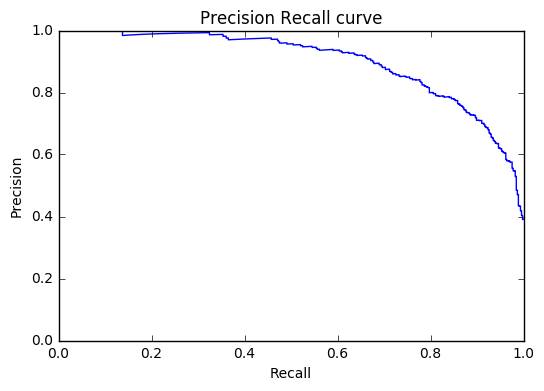

In [144]:
model.fit(df[features], df['Stable'])

#Predict training set:
dtest_predictions = model.predict(dftest[features])
dtest_predprob = model.predict_proba(dftest[features])[:,1] 

precision, recall, thresholds = precision_recall_curve(dftest['Stable'], dtest_predprob)

#Print model report:
print "\nModel Report"
print "AUC Score (Test): %f" % metrics.average_precision_score(dftest['Stable'], dtest_predprob)

fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall curve')

# set precision to % 90
dtest_predprob = model.predict_proba(dftest[features])[:,1] >= .90
precision, recall, thresholds = precision_recall_curve(dftest['Stable'], dtest_predprob)

print 'average recall at .90 precision:', np.mean(recall)

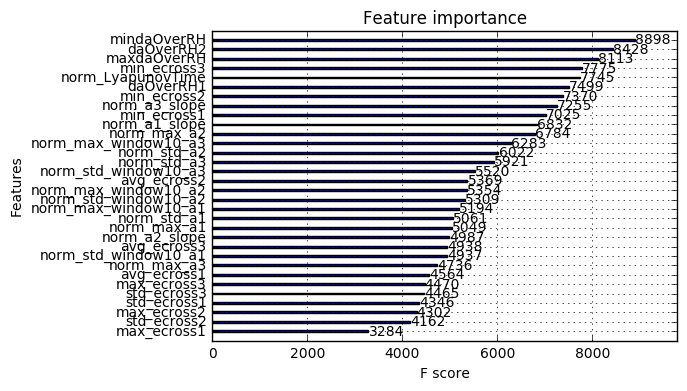

In [145]:
xgb.plot_importance(model)

In [146]:
# Values reported in paper: 

# Short Integration model 
model = XGBClassifier(colsample_bylevel=1, colsample_bytree=1,
                         n_estimators=5000, gamma=0,
                         max_delta_step=0, missing=None, 
                         reg_alpha=0, reg_lambda=1,
                         scale_pos_weight=1, seed=27,
                        learning_rate=.00359, max_depth=8,
                        subsample=.5, min_child_weight=1.2, 
                        objective='binary:logistic', nthread=-1)



Model Report
AUC Score (Test): 0.899058
average recall at .90 precision: 0.53003003003


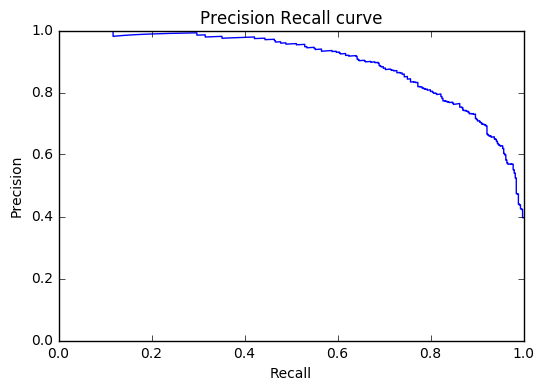

In [149]:
model.fit(df[features], df['Stable'])

#Predict training set:
dtest_predictions = model.predict(dftest[features])
dtest_predprob = model.predict_proba(dftest[features])[:,1] 

precision, recall, thresholds = precision_recall_curve(dftest['Stable'], dtest_predprob)

#Print model report:
print "\nModel Report"
print "AUC Score (Test): %f" % metrics.average_precision_score(dftest['Stable'], dtest_predprob)

fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall curve')

# set precision to % 90
dtest_predprob = model.predict_proba(dftest[features])[:,1] >= .90
precision, recall, thresholds = precision_recall_curve(dftest['Stable'], dtest_predprob)

print 'average recall at .90 precision:', np.mean(recall)

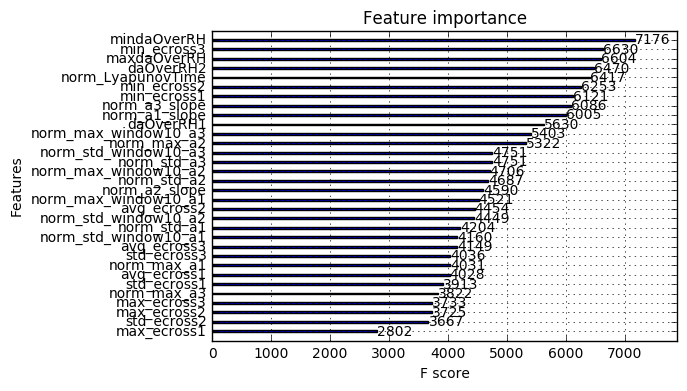

In [150]:
xgb.plot_importance(model)